<div style = "font-size: 23px"><b>Data Science & Business Analytics Intern at The Sparks Foundation</b></div>
<br>
<div style = "font-size: 18px">
<b><I>Task #3: Exploratory Data Analysis.</b></I>
<br><b><br>
Author : Umadevi Balasubramanian</b></div>

<b>In this task, we are performing 'Exploratory Data Analysis' on the dataset <i> "SampleSuperStore" </i>. As a business manager, 
we will try to find out the weak areas where we can work to make more Profit. Also, we are trying to find what all 
business problems can be derived by exploring the data. </b>

## <span style="color:blue"><b>The Exploratory Data Analysis</b></span> involves 3 main parts.<br>
<span style="font-size:20px">
<ul><li>Understanding the Data</li>
    <li>Data Cleaning</li>
    <li>Analysis of Relationships between the variables</li></ol></span>

## <center> I. Understanding the Data.</center>

In [1]:
# Importing all the libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<b>1.1: Reading the Dataset.</b>

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

<b>1.2: Display Informations about data.</b>

In [3]:
data.head()   # Display First 5 records.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()   # Disply Last 5 records.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data.shape   # Display No.of Rows and Columns.

(9994, 13)

In [6]:
data.nunique(axis=0)   # Count distinct observations on rowwise.

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<b> Data Understanding is completed. </b>

## <center> II. Data Cleaning </center>

<b>2.1: Handling Missing data.</b>

In [8]:
data.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<b> The above two results clearly shows that our dataset has NO missing data.</b>

<b>2.2: Removing Duplicates.</b>

In [10]:
count = data.duplicated().sum()
print(count)

17


In [11]:
duplicate_data = data.apply(lambda x: x.duplicated()).sum()
print(duplicate_data)

Ship Mode       9990
Segment         9991
Country         9993
City            9463
State           9945
Postal Code     9363
Region          9990
Category        9991
Sub-Category    9977
Sales           4169
Quantity        9980
Discount        9982
Profit          2707
dtype: int64


In [12]:
# Removing Duplicates.

data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<b> Initially we had 9,994 rows of data. After removing the 17 duplicate records, now we have 9977 rows of data.</b>

<b>2.3: Removing Irrelevant data. (Irrelevant column</b>)

In [13]:
# Postal code is not necessary. So remove that column.

data.drop('Postal Code', axis='columns', inplace=True)

In [14]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<b> Postal Code column is removed, remaining 12 columns are shown</b>

<b>2.4: Handling Outliers.</b>

<b> Quantity, Discount, Sales and Profit are the 4 numeric fields, for which we are going to check for outliers, if any.</b>

<AxesSubplot:xlabel='Discount'>

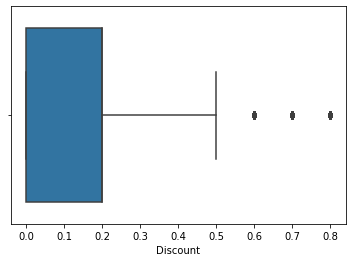

In [15]:
sns.boxplot(data['Discount'])

<AxesSubplot:xlabel='Quantity'>

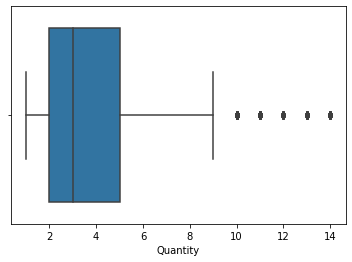

In [16]:
sns.boxplot(data['Quantity'])

<AxesSubplot:ylabel='Sales'>

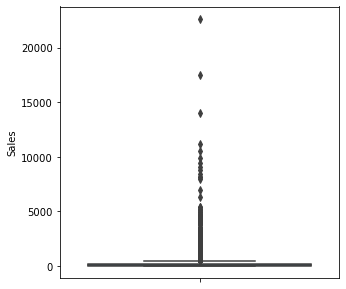

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Sales', data=data)

<AxesSubplot:xlabel='Profit'>

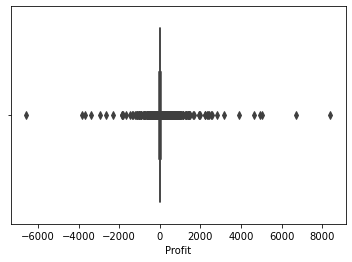

In [18]:
sns.boxplot(data['Profit'])

<h2><b><span style = 'color:MediumVioletRed'> The above Box Plots clearly shows that there are Outliers in Discount, Quantity, 
Sales and Profit.
</span></b></h2>

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

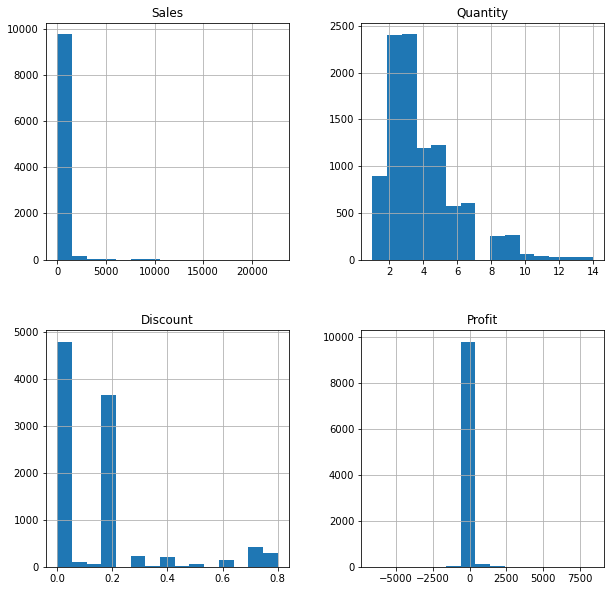

In [19]:
data.hist(bins=15, figsize=(10,10))

<b> Data Cleaning is completed.</b>

## <center> III. Analysis of Relationship between Variables & Arriving Conclusions. </center>

In [20]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

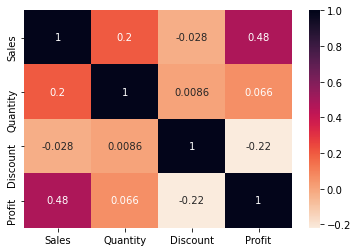

In [21]:
sns.heatmap(data.corr(),cmap='rocket_r', annot=True)

<b> From the above result, we find the following observations. 
<ul><li>The Sales and Profit are positively correlated.</li>
    <li>The Discount and Profit are negatively correlated.</li>
    <li>The Quantity and Discount has a negative correlation.</li>
    <li>The Quantity and Profit has less correlation. </li>
    <li>The Quantity and Sales has less correlation.</li></ul></b>

<b><h2> 3.1: Univariate Analysis. </b></h2>

<b>3.1.1: Ship Mode </b>

In [22]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<b> The Ship Mode has 4 categories: Standard Class, First Class, Second Class and Same Day.</b>

<AxesSubplot:>

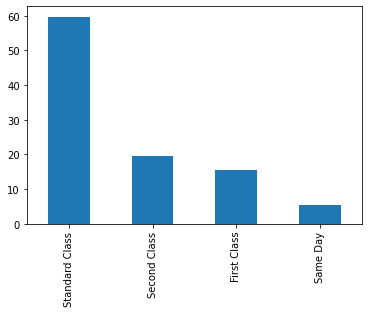

In [23]:
smode = (data['Ship Mode'].value_counts()) / len(data['Ship Mode'])*100
smode.plot(kind='bar')

<b> From the above graph, following conclusions are made:
<ol><li>Nearly 60% of the deliveries belong to the Standard Class.</li>
    <li>15% to 20% of the deliveries belong to First and Second Classes.</li>
    <li>Around 5% (Very less %) of the deliveries made on the Same Day.</li></ol></b>

<b>3.1.2: Segment. </b>

<AxesSubplot:>

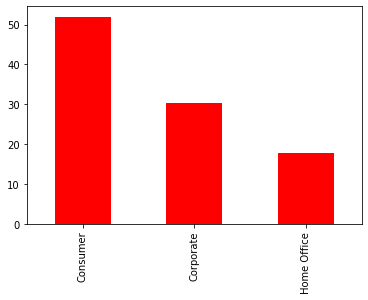

In [24]:
seg = (data['Segment'].value_counts()) / len(data['Segment'])*100
seg.plot(kind='bar', color='red')

<b> The Following Conclusions are derived from the above graph:
<ol><li>50% of the people belongs to Consumer Segment.</li>
    <li>Remaining 50% people belongs to (30% Corporate and 20% Home office) Corporate & Home Office Segment.</li></ol></b>

<b>3.1.3: Region.</b>

<AxesSubplot:>

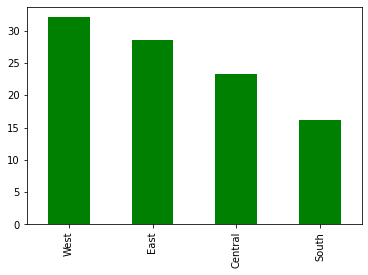

In [25]:
region = (data['Region'].value_counts()) / len(data['Region'])*100
region.plot(kind='bar', color='green')

<b> The following conclusions are made from the above graph.
<ol><li> The West Region and East Region has highest percentages (28 % to 38%) of deliveries by the Super store.</li>
    <li>Next comes the Central Region, with more than 20% of deliveries.</li>
    <li>The South Region has lower delivery rate of around 15%.</li></ol></b>

<b>3.1.4: Category.</b>

<AxesSubplot:>

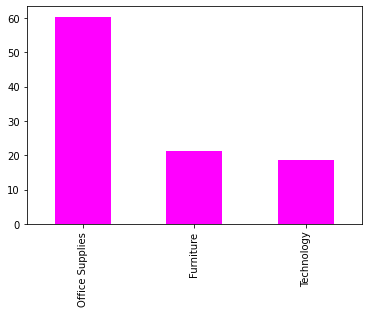

In [26]:
cat = (data['Category'].value_counts()) / len(data['Category'])*100
cat.plot(kind='bar', color='magenta')

<b> The following Conclusions are arrived from the above graph.
<ol><li>Most of the Categories of the Super store (Around 60%), belong to the Office Supplies.</li>
    <li>Around 20% belongs to Furniture and Technology Category.</li></ol></b>

<b>3.1.5: Sub-Category.</b>

<AxesSubplot:>

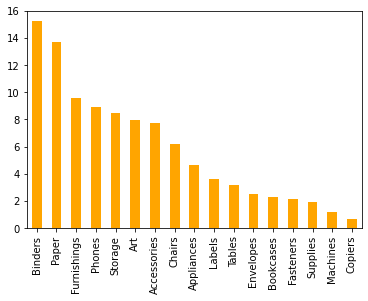

In [27]:
((data['Sub-Category'].value_counts()) / len(data['Sub-Category'])*100).plot(kind='bar', color='orange')

<b> The Conclusions made from the graph are:
<ol><li>9-15% Sub-Categories falls under Office Supplies(Furnishings, Paper & Binders).</li>
    <li>2-8% Sub-Categories falls under Technology and Furniture Category.</li></ol></b>

<h2><b>3.2: Bivariate Analysis</h2></b>

<b>3.2.1: Pairwise Relationship of data. 

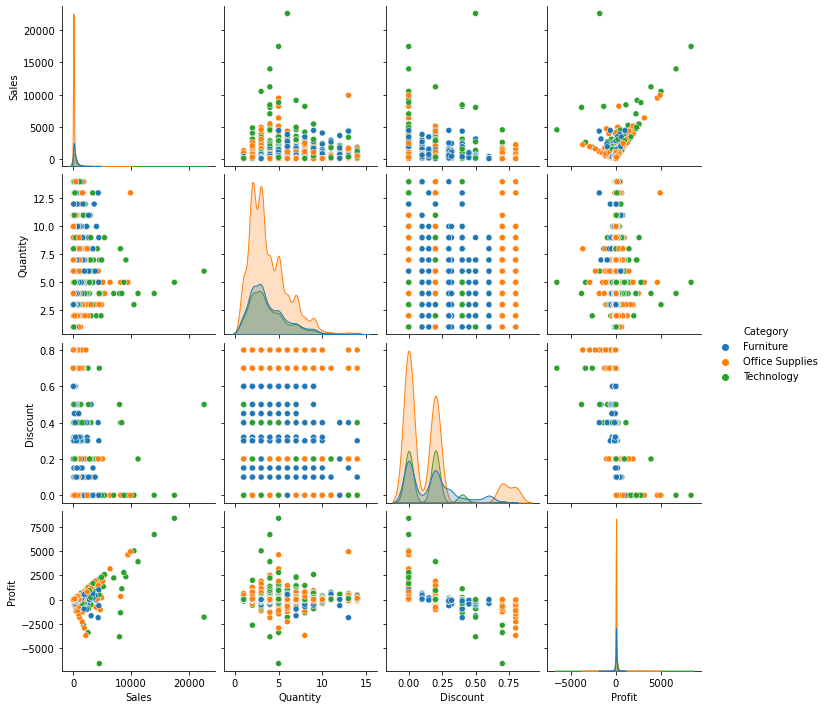

In [28]:
sns.pairplot(data, hue="Category")

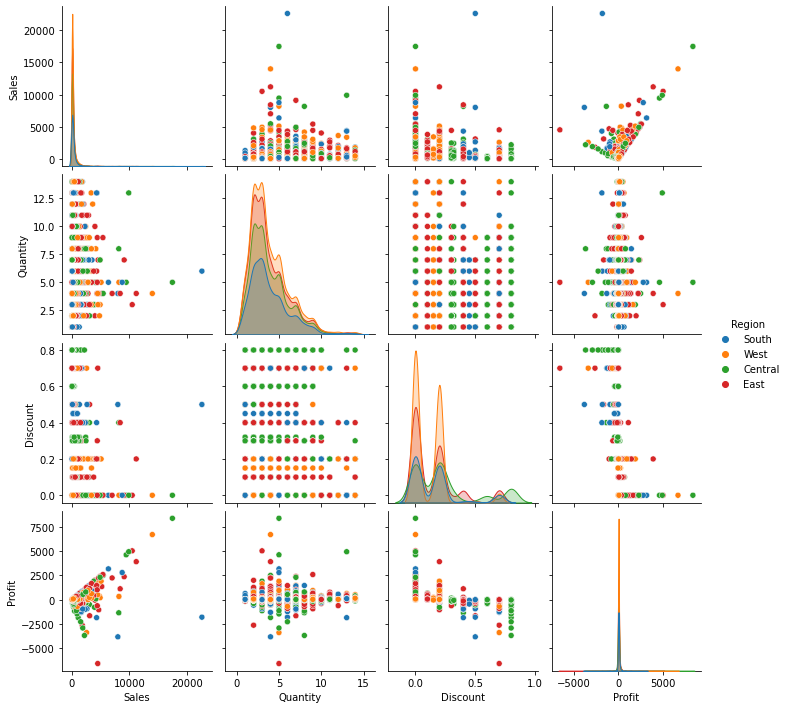

In [29]:
sns.pairplot(data=data, hue="Region")

<h2><b>3.3: MultiVariate Analysis</h2></b>

<b>3.3.1: Segment with Sales & Profit.</b>

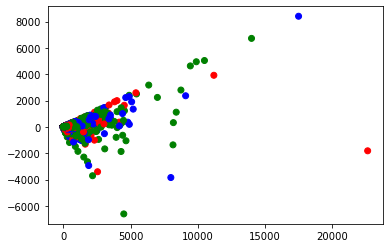

In [30]:
fig, ax = plt.subplots()
colors = {'Consumer': 'green', 'Corporate': 'blue', 'Home Office': 'red'}
ax.scatter(data['Sales'], data['Profit'],  c=data['Segment'].apply(lambda x: colors[x]))
plt.show()

<b><h2><span style='color:MediumVioletRed'>From the above graph, we can conclude that Consumer Segment produces high Profit.</h2></span></b>

<b> 3.3.2: Category with Sales & Profit.</b>

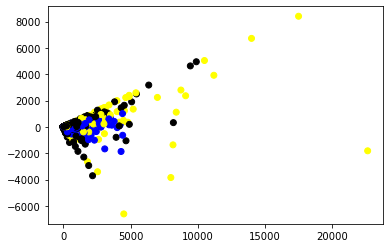

In [31]:
fig, ax = plt.subplots()
colors = {'Office Supplies': 'black', 'Furniture':'blue', 'Technology': 'yellow'}
ax.scatter(data['Sales'], data['Profit'], c=data['Category'].apply(lambda x: colors[x]))
plt.show()

<h2><b><span style='color:MediumVioletRed'>From the above graph, we conclude that Office Supplies category produces more Profit than other categories.
</span></b></h2>

<b>3.3.3: Region with Sales & Profit.</b>

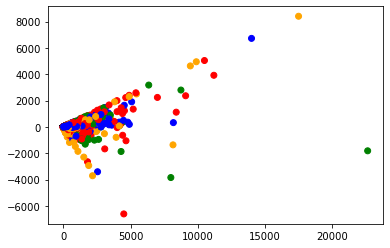

In [32]:
fig, ax = plt.subplots()
colors = {'East':'red', 'West':'Blue', 'South':'Green', 'Central':'orange'}
ax.scatter(data['Sales'], data['Profit'], c=data['Region'].apply(lambda x: colors[x]))
plt.show()

<h2><b><span style='color:MediumVioletRed'>Conclusion arrived from the above graph is  West Regions has 
more Profit than other regions.</span></b></h2>

<b>3.3.4: Analyse Sales & Profit for Segment based on Discount.</b>

In [33]:
data.pivot_table(values='Sales', index='Segment', columns='Discount', aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [34]:
data.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


<h2><b><span style='color:MediumVioletRed'>The above result depicts that, 
<ul><li>If Discount is there between 10% to 50%, Sales is there, but the SuperStore faces a loss.</li>
    <li>If Discount is between 0% to 20%, Sales is average, but, the Superstore gains Profit.</li>
    </ol></span></b></h2>

<b>Visualizing the above conclusion</b>

<AxesSubplot:ylabel='Frequency'>

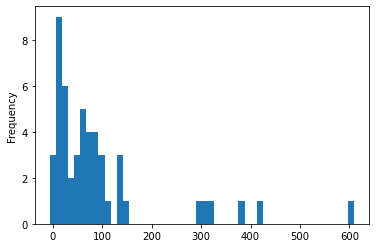

In [35]:
temp_data = data.loc[(data['Segment'] == 'Consumer') & (data['Discount'] == 0.1)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

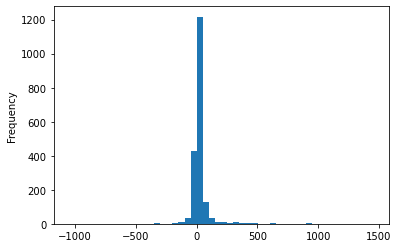

In [36]:
temp_data = data.loc[(data['Segment'] == 'Consumer') & (data['Discount'] == 0.2)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

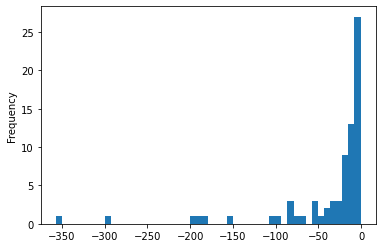

In [37]:
temp_data = data.loc[(data['Segment'] == 'Consumer') & (data['Discount'] == 0.6)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

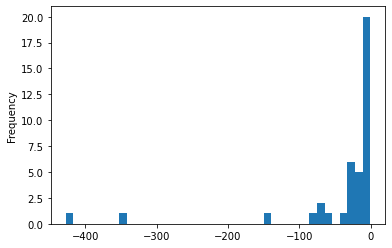

In [38]:
temp_data = data.loc[(data['Segment'] == 'Corporate') & (data['Discount'] == 0.6)]
temp_data['Profit'].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

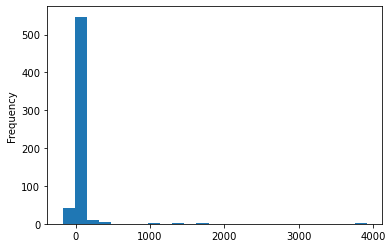

In [39]:
temp_data = data.loc[(data['Segment'] == 'Home Office') & (data['Discount'] == 0.2)]
temp_data['Profit'].plot.hist(bins=25)

<b> For all the Segments, If the Super Store offers Discount less than 30%, it gains some Profit. 
But, if the Discount is more than 50%, it faces loss. </b>

<b>3.3.5: Analyse Sales, Profit for Category based on Discount. </b>

<AxesSubplot:ylabel='Frequency'>

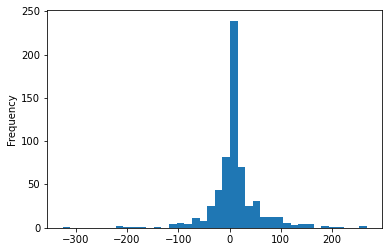

In [40]:
temp_data = data.loc[(data['Category'] == 'Furniture') & (data['Discount'] == 0.2)]
temp_data['Profit'].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

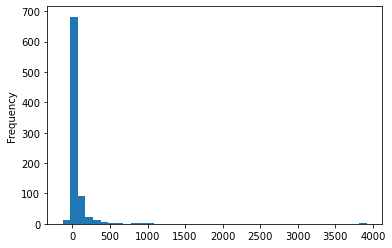

In [41]:
temp_data = data.loc[(data['Category'] == 'Technology') & (data['Discount'] == 0.2)]
temp_data['Profit'].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

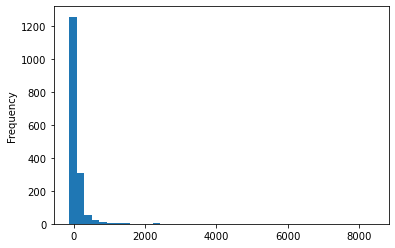

In [42]:
temp_data = data.loc[(data['Category'] == 'Technology') & (data['Discount'] <= 0.3)]
temp_data['Profit'].plot.hist(bins=40)

<AxesSubplot:ylabel='Frequency'>

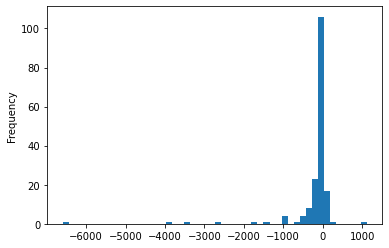

In [43]:
temp_data = data.loc[(data['Category'] == 'Technology') & (data['Discount'] >= 0.3)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

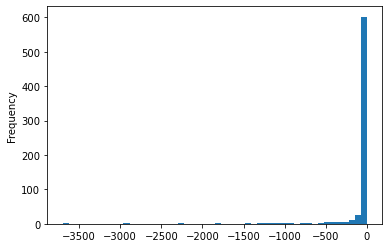

In [44]:
temp_data = data.loc[(data['Category'] == 'Office Supplies') & (data['Discount'] >= 0.3)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

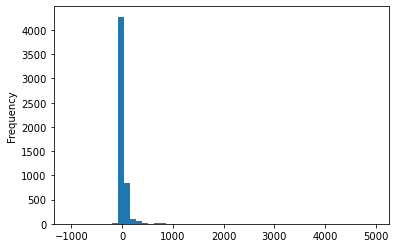

In [45]:
temp_data = data.loc[(data['Category'] == 'Office Supplies') & (data['Discount'] <= 0.3)]
temp_data['Profit'].plot.hist(bins=50)

<b> For all the Categories (Office Supplies, Furniture & Technology),<br>
    1. When Discount is <= 30%, the Sales leads to Profit.<br>
    2. If Discount >=30%, the Store faces big Loss.</b>

<b>3.3.6: Analysis based on Grouping - Analyse Sales, Profit based on Discount for Sub-Category wise.</b>

In [46]:
data_sub = data.groupby(['Sub-Category'])[['Discount', 'Sales', 'Profit']].mean()
print(data_sub.head())

              Discount       Sales     Profit
Sub-Category                                 
Accessories   0.078452  215.974604  54.111788
Appliances    0.166524  230.755710  38.922758
Art           0.074874   34.068834   8.200737
Binders       0.372292  133.560560  19.843574
Bookcases     0.211140  503.859633 -15.230509


(array([], dtype=float64), [])

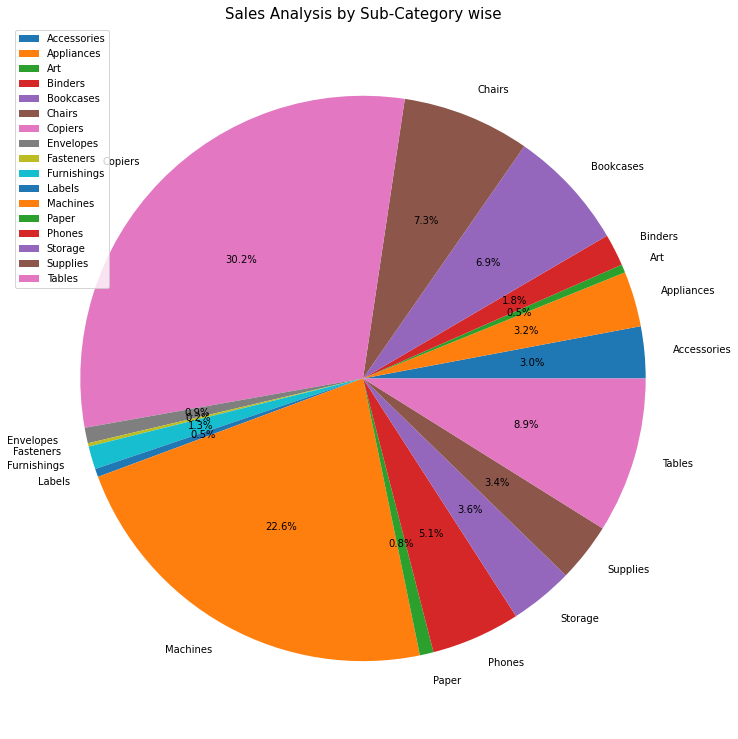

In [47]:
plt.figure(figsize=(13,13))
plt.pie(data_sub['Sales'], labels=data_sub.index, autopct='%1.1f%%')
plt.title('Sales Analysis by Sub-Category wise', fontsize=15)
plt.legend()
plt.xticks(rotation=90)

(array([], dtype=float64), [])

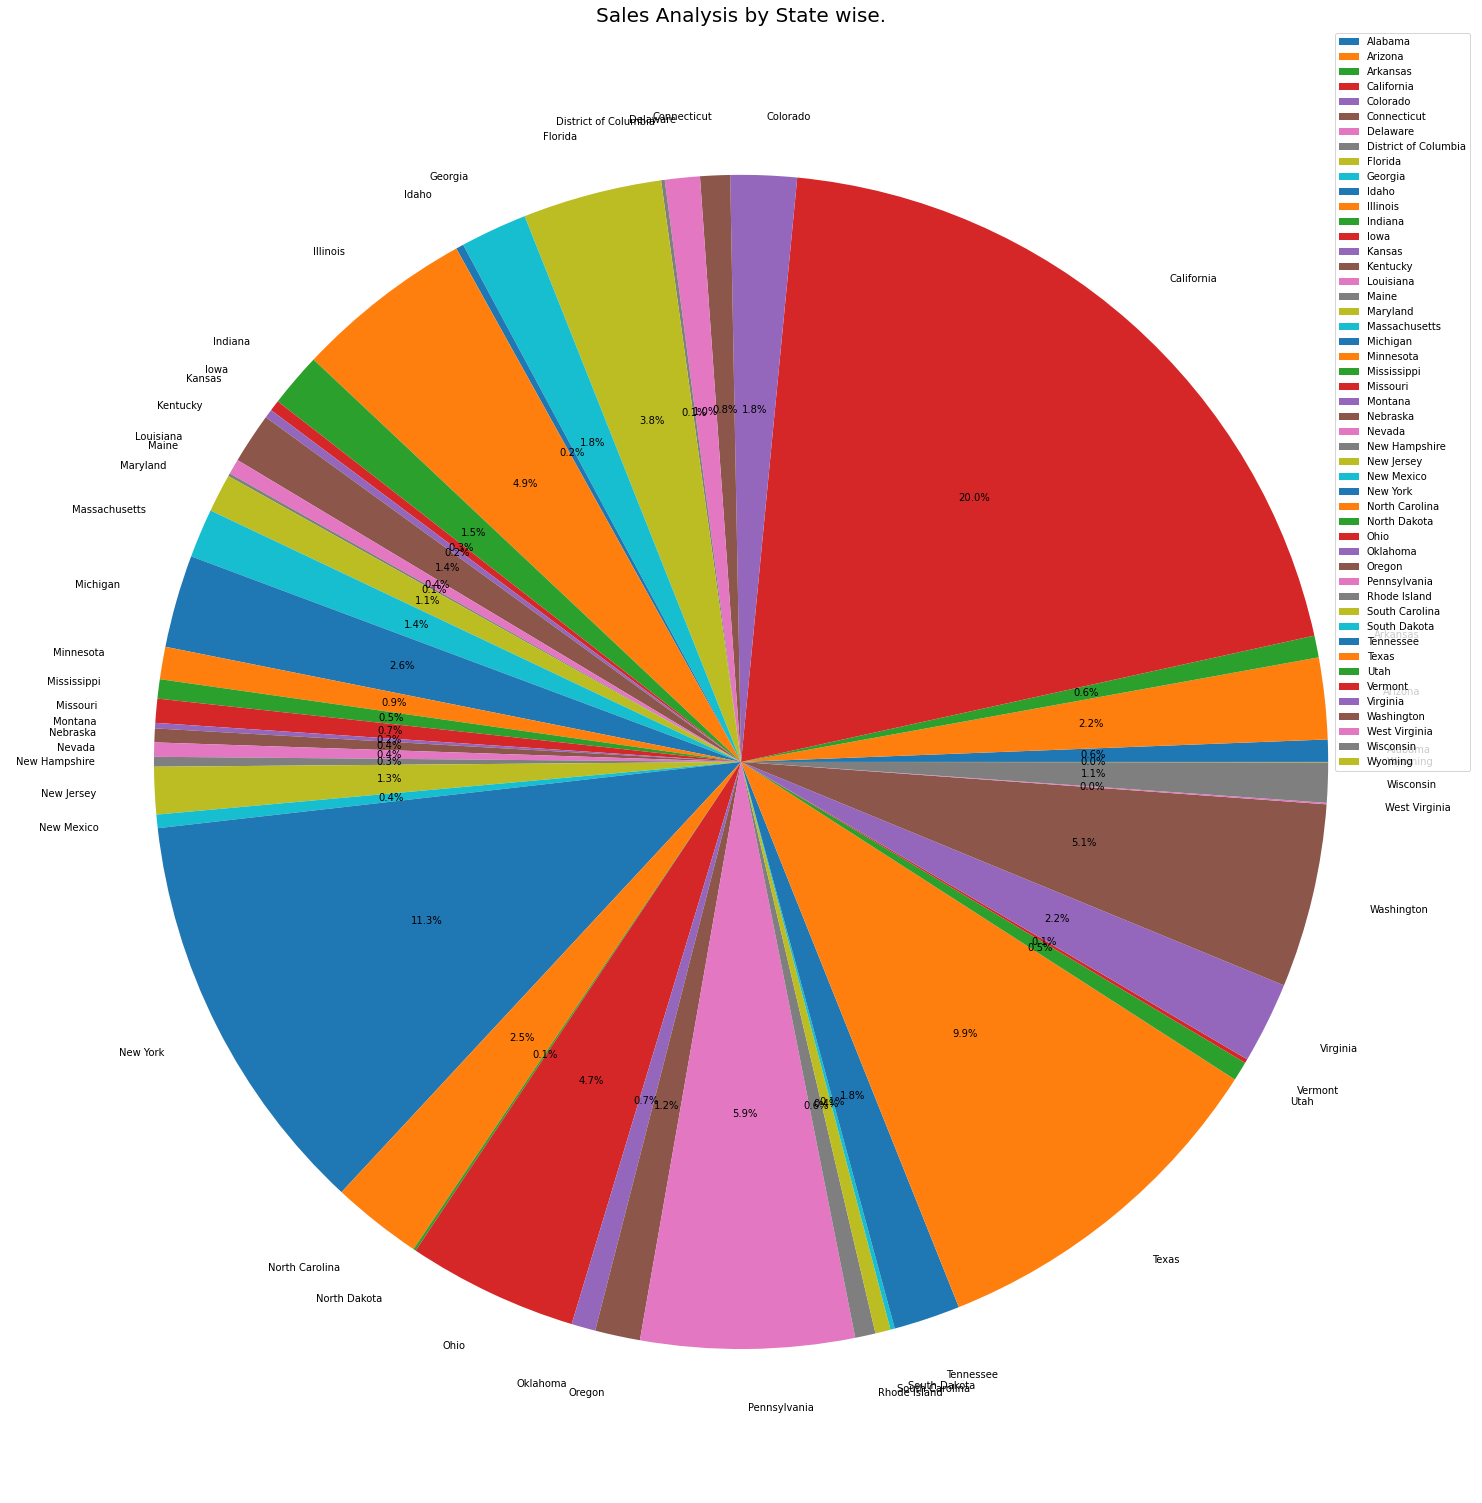

In [48]:
tempdata = data.groupby(['State'])[['Sales']].count()
plt.figure(figsize=(27,27))
plt.pie(tempdata['Sales'], labels=tempdata.index, autopct='%1.1f%%')
plt.title("Sales Analysis by State wise.",fontsize=20)
plt.legend()
plt.xticks(rotation=90)

(array([], dtype=float64), [])

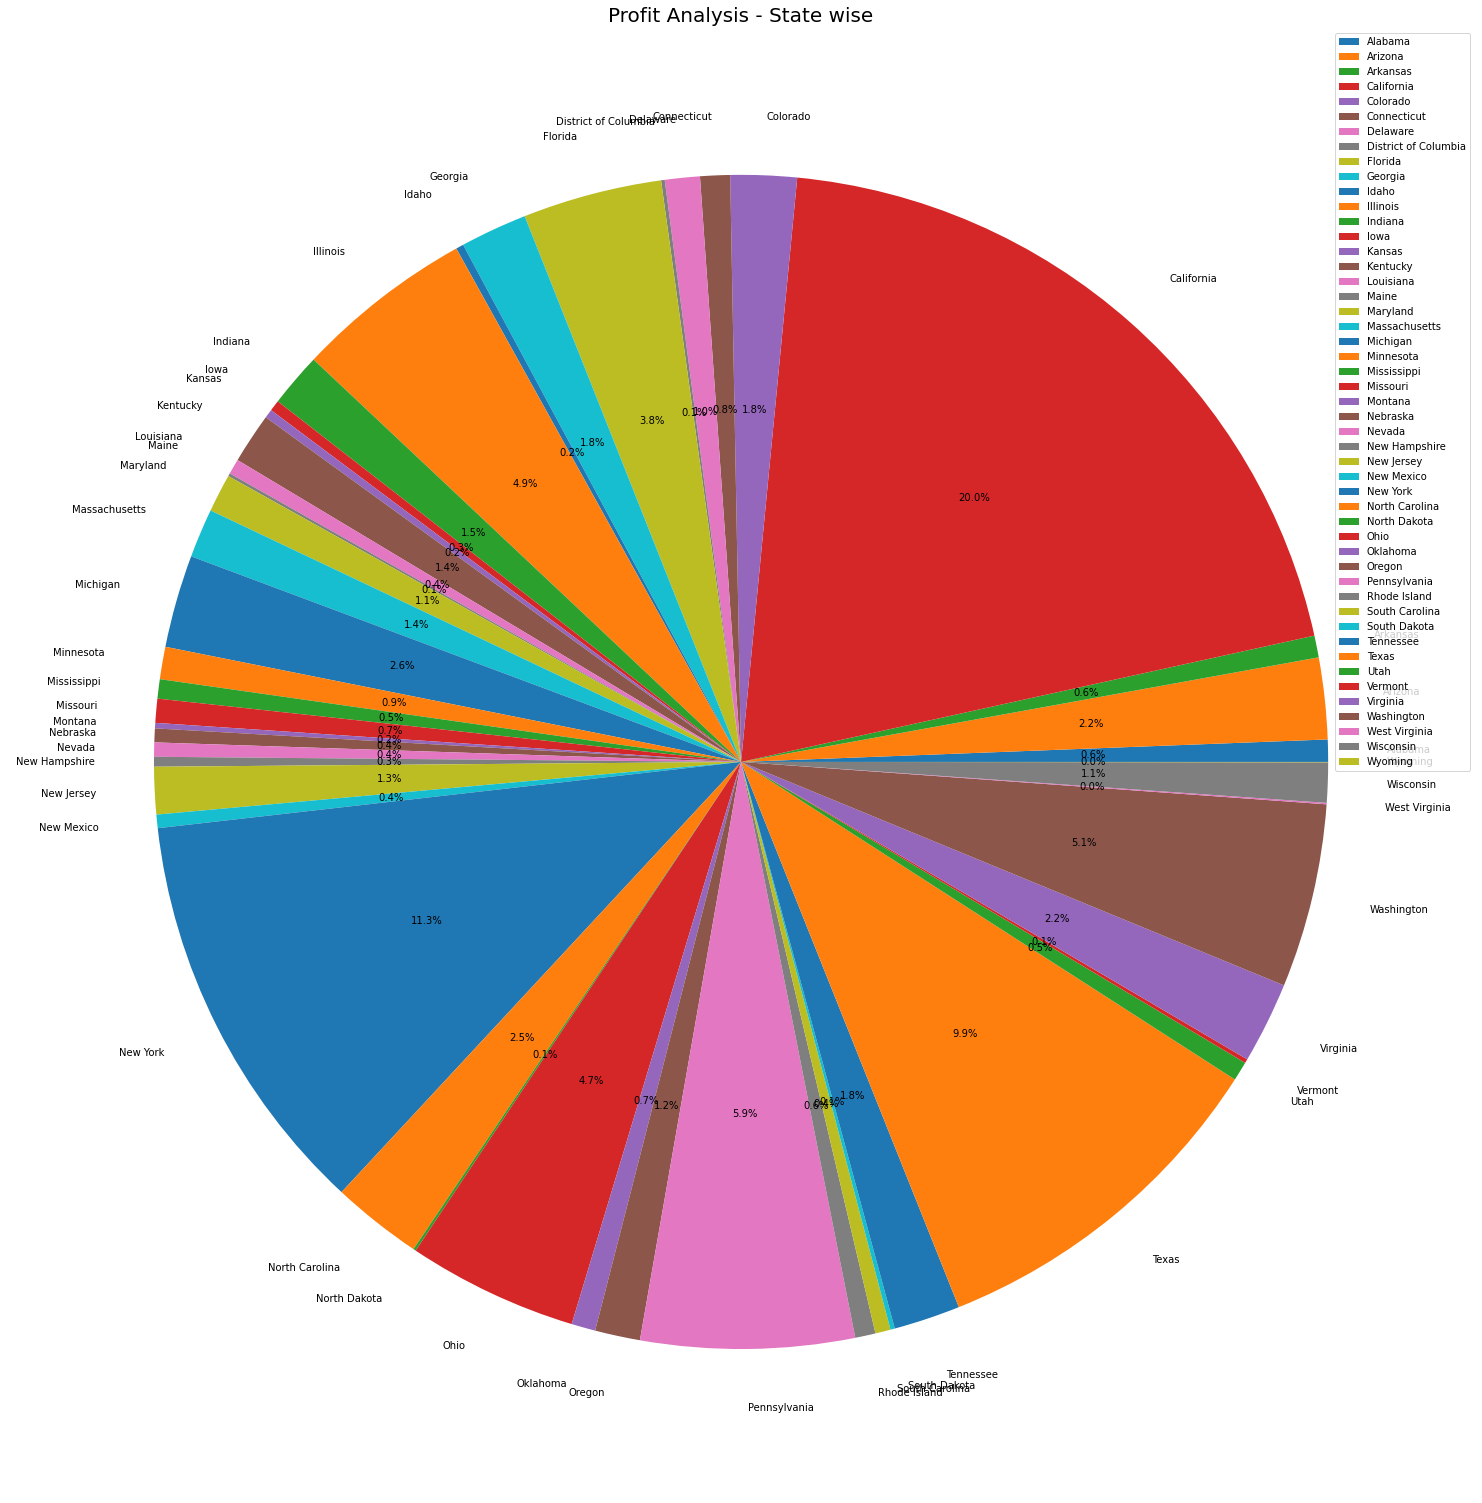

In [49]:
temppro = data.groupby(['State'])[['Profit']].count()
plt.figure(figsize=(27,27))
plt.pie(temppro['Profit'], labels=temppro.index, autopct='%1.1f%%')
plt.title("Profit Analysis - State wise", fontsize=20)
plt.legend()
plt.xticks(rotation=90)

<b> The above Pie charts clearly shows that California State has high Sales and produces High Profit. 
The weak areas are:Idaho, North Dakota, Vermont, Montana,New Hampshire, South Dakota.</b>

<b>3.3.7: Analysis of Sales, Profit & Quantity by Regionwise, Segmentwise & Categorywise.</b>

Text(0, 0.5, 'Count')

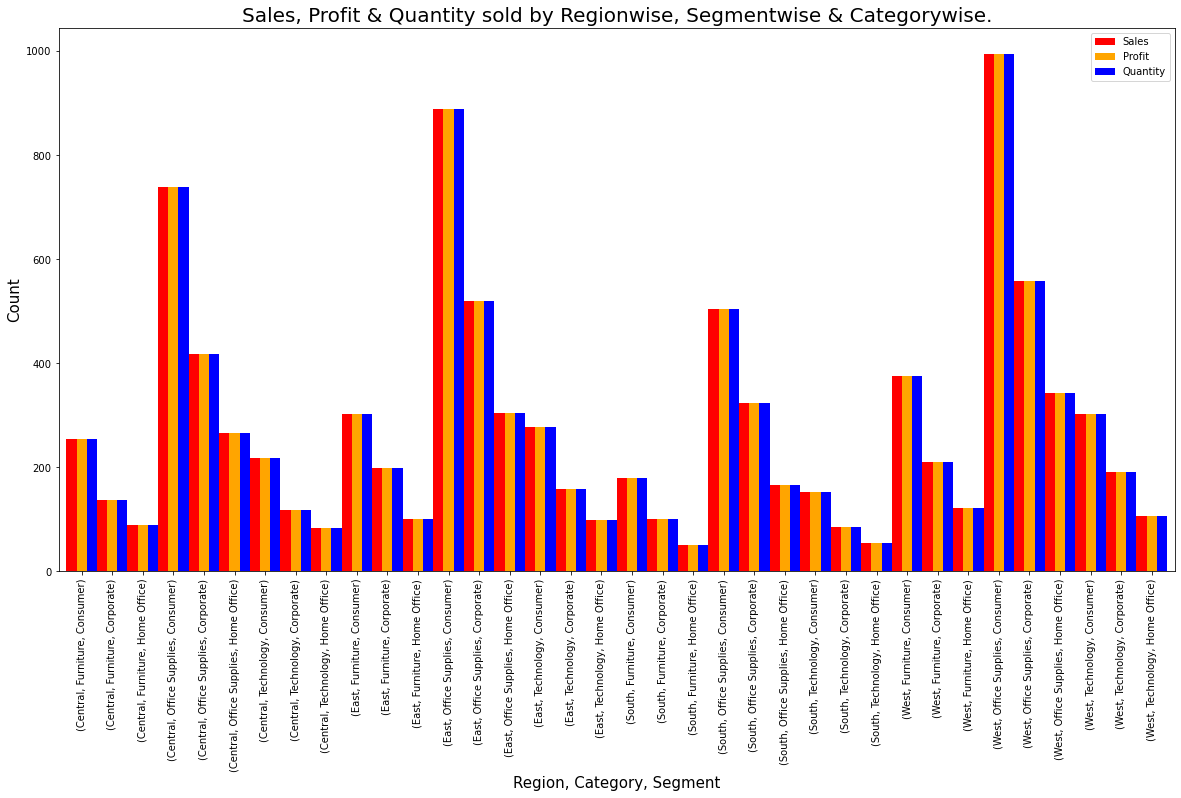

In [50]:
data_reg = data.groupby(['Region', 'Category', 'Segment'])['Sales', 'Profit', 'Quantity'].count().plot.bar(figsize=(20,10), 
                                                                                  width=1, color=['red','orange', 'blue'])
plt.title("Sales, Profit & Quantity sold by Regionwise, Segmentwise & Categorywise.", fontsize=20)
plt.xlabel("Region, Category, Segment", fontsize=15)
plt.ylabel("Count", fontsize=15)

<h3><b><span style='color: MediumVioletRed'>The Following Conclusions arrived from the above graph.<br>
<ul><li>The 'West' Region, 'Office Supplies' Category & 'Consumer' Segment have high Sales and produces high Profit.</li>
    <li>The weak areas to be concentrated are: <i> South Region, Technology & Furniture Categories & Home Office 
        Segment.</i></li>
    </ul></b></span></h3>

Text(0.5, 1.0, 'Statewise Sales, Profit & Quantity soldout.')

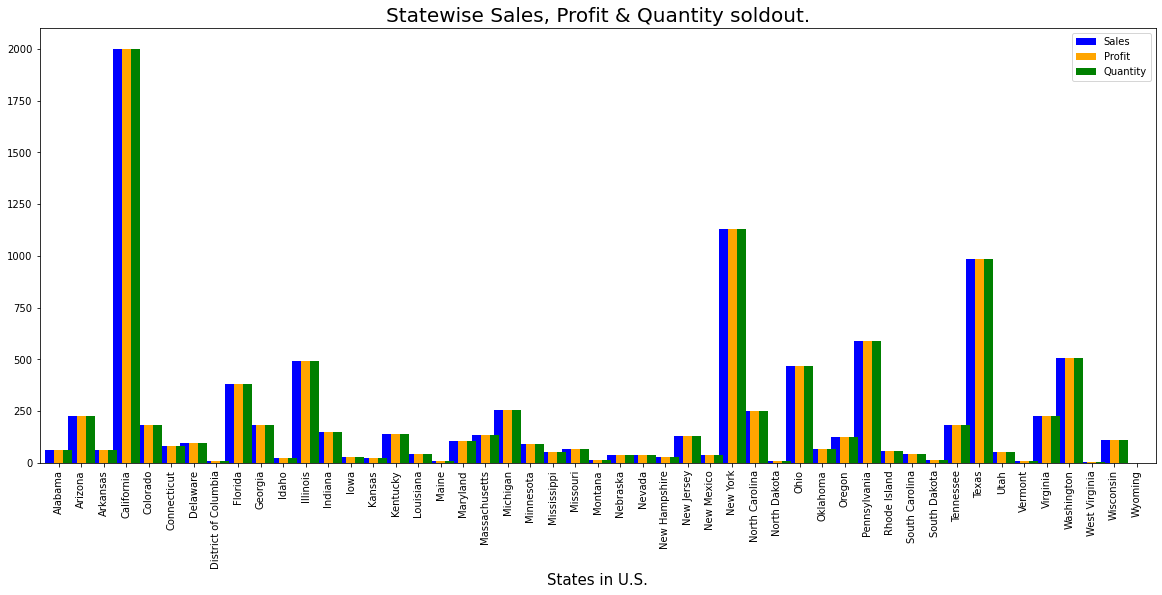

In [51]:
data_state = data.groupby(['State'])['Sales', 'Profit', 'Quantity'].count().plot.bar(figsize=(20,8), 
                                                                                     width=1.2, color=['blue','orange','green'])
plt.xlabel("States in U.S.", fontsize=15)
plt.title("Statewise Sales, Profit & Quantity soldout.", fontsize=20)

<h2><b><span style= 'color:MediumVioletRed'>The Conclusion Arrived is:The Super store in California State has 
        high Sales & Profit.</span></b></h2>

Text(0.5, 0, 'Sub-category')

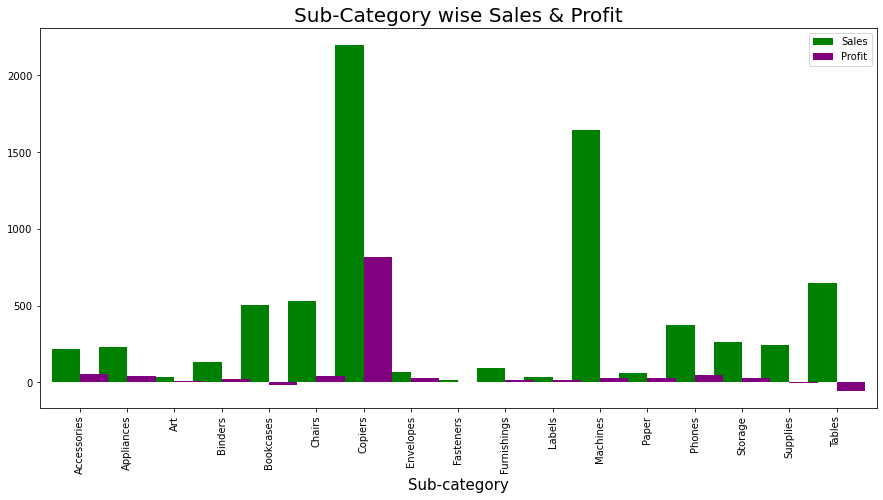

In [52]:
data_city = data.groupby(['Sub-Category'])['Sales', 'Profit'].mean().plot.bar(figsize=(15,7), width=1.2, color=['green', 'purple'])
plt.title("Sub-Category wise Sales & Profit", fontsize=20)
plt.xlabel("Sub-category", fontsize=15)

<h2><b><span style='color:MediumVioletRed'>The Weak areas Sub-Category wise are: Art, Fasteners, Envelopes, Labels, Paper, Envelopes.
    </span></b></h2>

<b> Relationship among variables is completed.</b>

<h2><b><center> <span style= 'color:blue'>The Exploratory Data Analysis is over.<br> Thank You !!!</center> </span></b></h2>